#                        PROBLEMATIC INTERNET USE


**The analysis belongs to the data provided by child mind institute and healthy brain network from United States.The study shows the internet usage spent by children for each specific age category and usage variation during seasonal change, and the children physical activities are monitored. ****

# Data collection:
Data is collected from child mind institute and healthy brain network and a predefined dataset on kaggle. 

1. train.csv </br>
2. test.csv  </br>
3. data_dictionary.csv  </br>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv
/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv
/kaggle/input/child-mind-institute-problematic-internet-use/train.csv
/kaggle/input/child-mind-institute-problematic-internet-use/test.csv
/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet/id=00115b9f/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet/id=001f3379/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=0745c390/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=eaab7a96/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=8ec2cc63/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=b2987a65/part-0.parquet
/kaggle/input/child-mind-institute-problematic-intern

# Data Imputation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import trim_mean
import seaborn as sns
import statistics
import warnings

In [3]:
#reading input files
train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')


In [4]:
train.shape

(3960, 82)

In [5]:
test.shape

(20, 59)

In [6]:
df_combined = pd.concat([train.reset_index(drop=True),test.reset_index(drop=True)],axis=1)
# Drop duplicate columns, keeping the first occurrence
df_combined = df_combined.loc[:, ~df_combined.columns.duplicated()]

1. id
Description: A unique identifier in the dataset.
2. Basic_Demos-Enroll_Season
Description: The season during which the individual enrolled in the study or program (e.g., Fall, Summer).
3. Basic_Demos-Age
Description: The age at the time of enrollment or data collection.
4. Basic_Demos-Sex
Description: The gender of the individual, where 0 = male and 1 = female.
5. CGAS-Season
Description: The season during which the Children's Global Assessment Scale (CGAS) score was assessed during Winter, Summer, fall.
6. CGAS-CGAS_Score
Description: The score which evaluate the overall functioning of a child or adolescent from the Children's Global Assessment Scale.
7. Physical-Season
Description: The season during which physical measurements (e.g., height, weight, BMI) were taken.
8. Physical-BMI
Description: The Body Mass Index (BMI) of the individual, which is a measure of body fat based on height and weight.
9. Physical-Height
Description: The height of the individual, typically measured in centimeters or inches.
10. Physical-Weight
Description: The weight of the individual, usually measured in kilograms or pounds.
11. PCIAT-PCIAT_18
Description: The score or measurement from a specific assessment, potentially related to a cognitive or physical task, conducted in 2018.
12. PCIAT-PCIAT_19
Description: The score or measurement from the same assessment as above, conducted in 2019.
13. PCIAT-PCIAT_20
Description: The score or measurement from the same assessment, conducted in 2020.
14. PCIAT-PCIAT_Total
Description: The total or cumulative score from the PCIAT assessment over the different years.
15. SDS-Season
Description: The season during which the Standardized Developmental Score (SDS) was assessed.
16. SDS-SDS_Total_Raw
Description: The raw score from the Standardized Developmental Score (SDS) assessment, which could represent unadjusted values.
17. SDS-SDS_Total_T
Description: The "T" score from the SDS, which might represent a standardized score, where raw data is transformed into a standardized format with a mean and standard deviation.
18. PreInt_EduHx-Season
Description: The season in which educational history data related to the individual (possibly prior to intervention) was collected.
19. PreInt_EduHx-computerinternet_hoursday
Description: The number of hours the individual spends on a computer or using the internet per day before the intervention (possibly an indicator of screen time or technology exposure).
20. sii
Description: This abbreviation is unclear without additional context. It could refer to a specific score, index, or measure related to the individual. It might stand for something like "Social Interaction Index" or another domain-specific measure, but further information would be needed to clarify its exact meaning.


In [7]:
df_combined.head(2)

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0


In [8]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
# Display the count of missing values in all columns
df_combined.isna().sum().sort_values(ascending=False)

PAQ_A-PAQ_A_Total              3485
PAQ_A-Season                   3485
Fitness_Endurance-Time_Sec     3220
Fitness_Endurance-Time_Mins    3220
Fitness_Endurance-Max_Stage    3217
                               ... 
PreInt_EduHx-Season             420
Basic_Demos-Enroll_Season         0
Basic_Demos-Sex                   0
Basic_Demos-Age                   0
id                                0
Length: 82, dtype: int64

In [9]:
col_to_find = df_combined.columns[df_combined.applymap(lambda x: isinstance(x, str)).any()]
if len(col_to_find) > 0:
 print("Columns with strings:", col_to_find)
else:
 print("There are no strings in any column.")
# Select columns with numerical data types (int and float)

numerical_columns = df_combined.select_dtypes(include=['number']).columns
if len(numerical_columns) > 0:
 print("Columns with numbers:", numerical_columns)
else:
 print("There are no strings in any numbers.")

Columns with strings: Index(['id', 'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
       'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
       'PAQ_C-Season', 'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-Season'],
      dtype='object')
Columns with numbers: Index(['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins',
       'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone',
       'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone',
       'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone',
       'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_D

/tmp/ipykernel_17/2236221650.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  col_to_find = df_combined.columns[df_combined.applymap(lambda x: isinstance(x, str)).any()]


In [10]:
df_categorical= df_combined[['id', 'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season','Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
'PAQ_C-Season', 'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-Season']]
df_numerica = df_combined[['CGAS-CGAS_Score','Physical-BMI','Physical-Height','PCIAT-PCIAT_Total','SDS-SDS_Total_Raw','SDS-SDS_Total_T','PreInt_EduHx-computerinternet_hoursday','sii','PAQ_A-PAQ_A_Total','Fitness_Endurance-Time_Sec','Fitness_Endurance-Time_Mins','Fitness_Endurance-Max_Stage']]

# Calculate the percentage of each category in each column
category_percentages = df_categorical.apply(lambda col: col.value_counts(normalize=True) * 100)
category_percentages_nu = df_numerica.apply(lambda col: col.value_counts(normalize=True) * 100)

# Identify columns with more than and less than 50% missing values
missing_percentage = df_numerica.isnull().mean() * 100
columns_with_missing_data_g = missing_percentage[missing_percentage > 50]
columns_with_missing_data_l = missing_percentage[missing_percentage < 50]

# Identify columns with more than 50% missing values
missing_percentage_nu = df_numerica.isnull().mean() * 100
columns_with_missing_data_nu_g = missing_percentage[missing_percentage > 50]
columns_with_missing_data_nu_l = missing_percentage[missing_percentage < 50]

# Display the results
print("Category Percentages numerical:")
print(category_percentages_nu)
print(category_percentages)

print("\n Columns with more than 50% missing data:")
print(columns_with_missing_data_g)
print(columns_with_missing_data_l)
print(columns_with_missing_data_nu_g)
print(columns_with_missing_data_nu_l)

Category Percentages numerical:
        CGAS-CGAS_Score  Physical-BMI  Physical-Height  PCIAT-PCIAT_Total  \
0.00                NaN      0.231635              NaN          11.440058   
0.66                NaN           NaN              NaN                NaN   
0.99                NaN           NaN              NaN                NaN   
1.00                NaN           NaN              NaN           1.425439   
1.01                NaN           NaN              NaN                NaN   
...                 ...           ...              ...                ...   
97.00               NaN           NaN              NaN                NaN   
98.00               NaN           NaN              NaN                NaN   
99.00               NaN           NaN              NaN                NaN   
100.00              NaN           NaN              NaN                NaN   
999.00         0.041305           NaN              NaN                NaN   

        SDS-SDS_Total_Raw  SDS-SDS_Total_T 

In [11]:
df_combined[['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins',
       'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone',
       'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone',
       'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone',
       'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total',
       'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04',
       'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08',
       'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12',
       'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16',
       'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20',
       'PCIAT-PCIAT_Total', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T',
       'PreInt_EduHx-computerinternet_hoursday', 'sii']].isna().sum()

Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-CGAS_Score                           1539
Physical-BMI                               938
Physical-Height                            933
                                          ... 
PCIAT-PCIAT_Total                         1224
SDS-SDS_Total_Raw                         1351
SDS-SDS_Total_T                           1354
PreInt_EduHx-computerinternet_hoursday     659
sii                                       1224
Length: 70, dtype: int64

In [12]:
df_numerica = df_combined[['CGAS-CGAS_Score','Physical-BMI','Physical-Height','PCIAT-PCIAT_Total','SDS-SDS_Total_Raw','SDS-SDS_Total_T','PreInt_EduHx-computerinternet_hoursday','sii']].median()
df_combined[['CGAS-CGAS_Score','Physical-BMI','Physical-Height','PCIAT-PCIAT_Total','SDS-SDS_Total_Raw','SDS-SDS_Total_T','PreInt_EduHx-computerinternet_hoursday','sii']].fillna(df_numerica)

,CGAS-CGAS_Score,Physical-BMI,Physical-Height,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
0,51.0,16.877316,46.0,55.0,39.0,55.0,3.0,2.0
1,65.0,14.035590,48.0,0.0,46.0,64.0,0.0,0.0
2,71.0,16.648696,56.5,28.0,38.0,54.0,2.0,0.0
3,71.0,18.292347,56.0,44.0,31.0,45.0,0.0,1.0
4,65.0,17.937682,55.0,26.0,39.0,55.0,1.0,0.0
...,...,...,...,...,...,...,...,...
3955,60.0,16.362460,59.5,32.0,35.0,50.0,1.0,1.0
3956,65.0,18.764678,53.5,26.0,39.0,55.0,0.0,0.0
3957,68.0,21.441500,60.0,31.0,56.0,77.0,0.0,1.0
3958,70.0,12.235895,70.7,19.0,33.0,47.0,1.0,0.0


In [13]:
df_numerica = df_combined[['CGAS-CGAS_Score','Physical-BMI','Physical-Height','PCIAT-PCIAT_Total','SDS-SDS_Total_Raw','SDS-SDS_Total_T','PreInt_EduHx-computerinternet_hoursday','sii']].median()
df_combined[['CGAS-CGAS_Score','Physical-BMI','Physical-Height','PCIAT-PCIAT_Total','SDS-SDS_Total_Raw','SDS-SDS_Total_T','PreInt_EduHx-computerinternet_hoursday','sii']].fillna(df_numerica)

,CGAS-CGAS_Score,Physical-BMI,Physical-Height,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
0,51.0,16.877316,46.0,55.0,39.0,55.0,3.0,2.0
1,65.0,14.035590,48.0,0.0,46.0,64.0,0.0,0.0
2,71.0,16.648696,56.5,28.0,38.0,54.0,2.0,0.0
3,71.0,18.292347,56.0,44.0,31.0,45.0,0.0,1.0
4,65.0,17.937682,55.0,26.0,39.0,55.0,1.0,0.0
...,...,...,...,...,...,...,...,...
3955,60.0,16.362460,59.5,32.0,35.0,50.0,1.0,1.0
3956,65.0,18.764678,53.5,26.0,39.0,55.0,0.0,0.0
3957,68.0,21.441500,60.0,31.0,56.0,77.0,0.0,1.0
3958,70.0,12.235895,70.7,19.0,33.0,47.0,1.0,0.0


In [14]:
print(df_combined.columns)

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [15]:
df_categorical= df_combined[['id', 'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season','Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
'PAQ_C-Season', 'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-Season']]
df_numerica = df_combined[['CGAS-CGAS_Score','Physical-BMI','Physical-Height','PCIAT-PCIAT_Total','SDS-SDS_Total_Raw','SDS-SDS_Total_T','PreInt_EduHx-computerinternet_hoursday','sii','PAQ_A-PAQ_A_Total','Fitness_Endurance-Time_Sec','Fitness_Endurance-Time_Mins','Fitness_Endurance-Max_Stage']]

# Calculate the percentage of each category in each column
category_percentages = df_categorical.apply(lambda col: col.value_counts(normalize=True) * 100)
category_percentages_nu = df_numerica.apply(lambda col: col.value_counts(normalize=True) * 100)

# Identify columns with more than and less than 50% missing values
missing_percentage = df_numerica.isnull().mean() * 100
columns_with_missing_data_g = missing_percentage[missing_percentage > 50]
columns_with_missing_data_l = missing_percentage[missing_percentage < 50]

# Identify columns with more than 50% missing values
missing_percentage_nu = df_numerica.isnull().mean() * 100
columns_with_missing_data_nu_g = missing_percentage[missing_percentage > 50]
columns_with_missing_data_nu_l = missing_percentage[missing_percentage < 50]

# Display the results
print("Category Percentages numerical:")
print(category_percentages_nu)
print(category_percentages)

print("\n Columns with more than 50% missing data:")
print(columns_with_missing_data_g)
print(columns_with_missing_data_l)
print(columns_with_missing_data_nu_g)
print(columns_with_missing_data_nu_l)

Category Percentages numerical:
        CGAS-CGAS_Score  Physical-BMI  Physical-Height  PCIAT-PCIAT_Total  \
0.00                NaN      0.231635              NaN          11.440058   
0.66                NaN           NaN              NaN                NaN   
0.99                NaN           NaN              NaN                NaN   
1.00                NaN           NaN              NaN           1.425439   
1.01                NaN           NaN              NaN                NaN   
...                 ...           ...              ...                ...   
97.00               NaN           NaN              NaN                NaN   
98.00               NaN           NaN              NaN                NaN   
99.00               NaN           NaN              NaN                NaN   
100.00              NaN           NaN              NaN                NaN   
999.00         0.041305           NaN              NaN                NaN   

        SDS-SDS_Total_Raw  SDS-SDS_Total_T 

In [16]:
df_combined.shape

(3960, 82)

EXPLANATORY DATA ANALYSIS

In [17]:
df_combined.describe()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,3960.000000,3960.000000,2421.000000,3022.000000,3027.000000,3076.000000,898.000000,2954.000000,2967.000000,2954.000000,743.000000,740.000000,740.000000,2322.000000,2282.000000,1074.000000,1062.000000,1074.000000,1063.000000,2310.000000,2271.000000,2305.000000,2267.000000,2307.000000,2269.000000,2324.000000,2285.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.00000,1991.000000,1991.000000,1991.000000,475.000000,1721.000000,2733.000000,2734.000000,2731.000000,2731.000000,2729.000000,2732.000000,2729.000000,2730.000000,2730.000000,2733.000000,2734.000000,2731.000000,2729.000000,2732.000000,2730.000000,2728.000000,2725.000000,2728.000000,2730.000000,2733.000000,2736.000000,2609.000000,2606.000000,3301.000000,2736.000000
mean,10.433586,0.372727,65.454771,19.331929,55.946713,89.038615,27.278508,69.648951,81.597236,116.983074,4.989233,7.370270,27.581081,11.259690,0.476337,22.420438,1.829567,23.518622,1.904045,5.579654,0.330251,8.694924,0.618880,8.805635,0.620097,9.252775,0.785558,2.651431,6.719826,19.367048,1237.018187,2064.693747,20.825346,74.021708,15.030554,4.336495,16.855020,1.745354,33.173380,20.02299,67.301883,34.389466,53.998726,2.178853,2.589550,2.370655,2.177762,2.399854,0.839253,2.297545,1.063690,0.586295,1.246520,1.062637,1.304793,1.685443,0.244599,1.340051,1.035505,1.499634,1.452346,1.627890,1.613636,1.158974,0.943652,27.896199,41.088923,57.763622,1.060588,0.580409
std,3.574648,0.483591,22.341862,5.113934,7.473764,44.569040,5.567287,13.611226,13.665196,17.061225,2.014072,3.189662,17.707751,11.807781,0.499549,10.833995,0.612585,11.148951,0.612344,7.390161,0.470407,3.429301,0.485769,3.422167,0.485469,2.988863,0.410525,1.028267,92.586325,5.047848,1872.383246,2836.246272,73.266287,199.433753,5.792505,6.356402,199.372119,0.680635,56.272346,70.21561,108.705918,84.050607,129.362539,0.849476,0.783937,1.673312,1.697117,1.588807,1.195601,1.705218,1.268282,1.049355,1.342582,1.258797,1.331715,1.543074,0.522956,1.411156,1.301712,1.492929,1.495600,1.445622,1.529178,1.343661,1.185460,20.338853,10.427433,13.196091,1.094875,0.771122
min,5.000000,0.000000,25.000000,0.000000,33.000000,0.000000,18.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.789610,0.048267,813.397000,1073.450000,1.789450,28.900400,7.864850,-194.163000,-8745.080000,1.000000,14.489000,4.63581,23.620100,4.655730,20.589200,0.660000,0.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,59.000000,15.869350,50.000000,57.200000

In [18]:
#selected features based on summary statistics
df_copy = df_combined[['Basic_Demos-Age','Basic_Demos-Sex','CGAS-CGAS_Score','Physical-Weight','Physical-Diastolic_BP','Physical-HeartRate','Physical-Systolic_BP','BIA-BIA_BMR','BIA-BIA_DEE','BIA-BIA_FFM','PCIAT-PCIAT_Total','SDS-SDS_Total_Raw','SDS-SDS_Total_T']]

In [19]:
from sklearn.impute import KNNImputer

# Columns to impute
columns_to_impute = ['PAQ_A-PAQ_A_Total', 'Fitness_Endurance-Time_Sec', 'Fitness_Endurance-Time_Mins']

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Check if all columns to impute exist in the DataFrame
missing_columns = [col for col in columns_to_impute if col not in df_copy.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Apply the imputer to the selected columns
    df_combined[columns_to_impute] = knn_imputer.fit_transform(df_combined[columns_to_impute])
    print("Imputation completed successfully.")

# Check if there are any missing values left after imputation
print("Missing values after imputation:")
print(df_combined.isnull().sum())


Missing columns: ['PAQ_A-PAQ_A_Total', 'Fitness_Endurance-Time_Sec', 'Fitness_Endurance-Time_Mins']
Missing values after imputation:
id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                               1405
                                          ... 
SDS-SDS_Total_Raw                         1351
SDS-SDS_Total_T                           1354
PreInt_EduHx-Season                        420
PreInt_EduHx-computerinternet_hoursday     659
sii                                       1224
Length: 82, dtype: int64


In [20]:
from scipy.stats import trim_mean
mean_value = df_copy['Basic_Demos-Age'].mean()
median_value =df_copy['Basic_Demos-Age'].median()
mode_value = df_copy['Basic_Demos-Age'].mode()
skewness_value= round(sts.skew(df_copy['Basic_Demos-Age'],axis=0, bias=True),1)
IQR = round(sts.iqr(df_copy['Basic_Demos-Age'],axis=0,rng=(25,75)),2)
kurtosis = round(sts.kurtosis(df_copy['Basic_Demos-Age'],axis=0, bias=True, fisher=0),1)

lower_bound = df_copy['Basic_Demos-Age'].quantile(0.25) - 1.5 * IQR
upper_bound = df_copy['Basic_Demos-Age'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df_copy[(df_copy['Basic_Demos-Age'] < lower_bound) | (df_copy['Basic_Demos-Age'] > upper_bound)].shape[0]

trim_propotion= 0.1
trimmed_mean= trim_mean(df_copy['Basic_Demos-Age'],trim_propotion)

print("Mean:" ,mean_value)
print("Median:",median_value)
print("Mode:",mode_value)
print("Skewness:",skewness_value)
print("IQR:",IQR)
print("kurtosis:",kurtosis)
print("outlier:", outliers_count)
print("trimmed_mean:",trimmed_mean)

Mean: 10.43358585858586
Median: 10.0
Mode: 0    8
Name: Basic_Demos-Age, dtype: int64
Skewness: 0.7
IQR: 5.0
kurtosis: 2.9
outlier: 37
trimmed_mean: 10.127840909090908


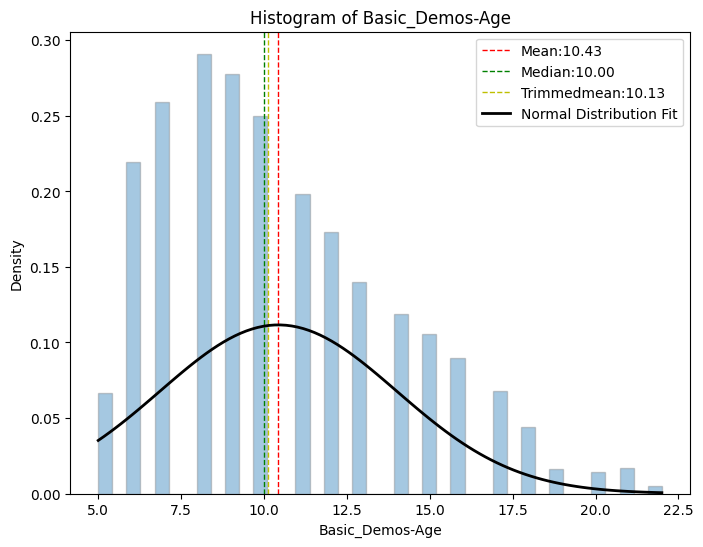

In [21]:
#figure size
plt.rcParams['figure.figsize'] = (8, 6)

#specifying histogram and bins
hist,bin_edges = np.histogram(df_copy['Basic_Demos-Age'],bins=40,density=True)
plt.hist(df_copy['Basic_Demos-Age'], bins=40, density=True, edgecolor='grey', alpha=0.4)

plt.axvline(mean_value, color='r', linestyle='dashed',linewidth=1, label= f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label= f'Median:{ median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=1,label= f'Trimmedmean:{trimmed_mean:.2f}')

mn,std = sts.norm.fit(df_copy['Basic_Demos-Age'])

# Generate x values for the normal distribution curve
x_bin = np.linspace(bin_edges[0], bin_edges[-1], 100)

# Calculate normal distribution curve
y_curve = sts.norm.pdf(x_bin, mn, std)

# Plot normal distribution curve
plt.plot(x_bin, y_curve, 'k', linewidth=2, label='Normal Distribution Fit')

# Add labels, title, and legend
plt.xlabel('Basic_Demos-Age')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of Basic_Demos-Age')

# Show plot
plt.show()

In [22]:
from scipy.stats import skew, kurtosis  # Ensure you import the functions
from scipy.stats import trim_mean
trim_propotion= 0.1
mean_value = df_copy['Basic_Demos-Sex'].mean()
median_value =df_copy['Basic_Demos-Sex'].median()
mode_value = df_copy['Basic_Demos-Sex'].mode()

# Calculate skewness and kurtosis for 'PCIAT-PCIAT_Total' column
skewness_value = skew(df_copy['Basic_Demos-Sex'], nan_policy='omit')  # Ignore NaNs if any
kurtosis_value = kurtosis(df_copy['Basic_Demos-Sex'], nan_policy='omit')  # Ignore NaNs if any

skewness_value= round(sts.skew(df_copy['Basic_Demos-Sex'],axis=0, bias=True),1)
IQR = round(sts.iqr(df_copy['Basic_Demos-Sex'],axis=0,rng=(25,75)),2)
kurtosis = round(sts.kurtosis(df_copy['Basic_Demos-Sex'],axis=0, bias=True, fisher=0),1)
lower_bound = df_copy['Basic_Demos-Sex'].quantile(0.25) - 1.5 * IQR
upper_bound = df_copy['Basic_Demos-Sex'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df_copy[(df_copy['Basic_Demos-Sex'] < lower_bound) | (df_copy['Basic_Demos-Sex'] > upper_bound)].shape[0]

trimmed_mean= trim_mean(df_copy['Basic_Demos-Sex'],trim_propotion)
print("Mean:",mean_value)
print("Median:",median_value)
print("Mode:",mode_value)
print("Skewness:",skewness_value)
print("IQR:",IQR)
print("kurtosis:",kurtosis)
print("outlier:", outliers_count)
print("trimmed_mean:",trimmed_mean)

Mean: 0.37272727272727274
Median: 0.0
Mode: 0    0
Name: Basic_Demos-Sex, dtype: int64
Skewness: 0.5
IQR: 1.0
kurtosis: 1.3
outlier: 0
trimmed_mean: 0.3409090909090909


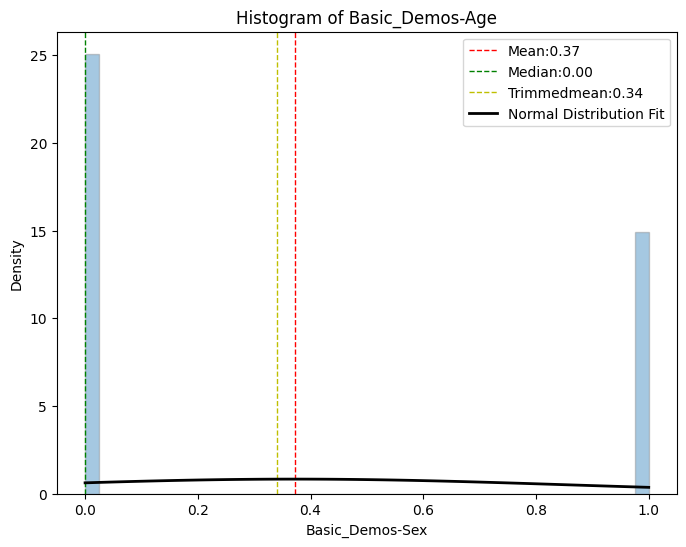

In [23]:
#figure size
plt.rcParams['figure.figsize'] = (8, 6)

#specifying histogram and bins
hist,bin_edges = np.histogram(df_copy['Basic_Demos-Sex'],bins=40,density=True)
plt.hist(df_copy['Basic_Demos-Sex'], bins=40, density=True, edgecolor='grey', alpha=0.4)

plt.axvline(mean_value, color='r', linestyle='dashed',linewidth=1, label= f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label= f'Median:{ median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=1,label= f'Trimmedmean:{trimmed_mean:.2f}')

mn,std = sts.norm.fit(df_copy['Basic_Demos-Sex'])

# Generate x values for the normal distribution curve
x_bin = np.linspace(bin_edges[0], bin_edges[-1], 100)

# Calculate normal distribution curve
y_curve = sts.norm.pdf(x_bin, mn, std)

# Plot normal distribution curve
plt.plot(x_bin, y_curve, 'k', linewidth=2, label='Normal Distribution Fit')

# Add labels, title, and legend
plt.xlabel('Basic_Demos-Sex')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of Basic_Demos-Age')

# Show plot
plt.show()

In [24]:
from scipy.stats import skew, kurtosis  # Ensure you import the functions
from scipy.stats import trim_mean
trim_propotion= 0.1
mean_value = df_copy['CGAS-CGAS_Score'].mean()
median_value =df_copy['CGAS-CGAS_Score'].median()
mode_value = df_copy['CGAS-CGAS_Score'].mode()

# Calculate skewness and kurtosis for 'PCIAT-PCIAT_Total' column
skewness_value = skew(df_copy['CGAS-CGAS_Score'], nan_policy='omit')  # Ignore NaNs if any
kurtosis_value = kurtosis(df_copy['CGAS-CGAS_Score'], nan_policy='omit')  # Ignore NaNs if any

skewness_value= round(sts.skew(df_copy['CGAS-CGAS_Score'],axis=0, bias=True),1)
IQR = round(sts.iqr(df_copy['CGAS-CGAS_Score'],axis=0,rng=(25,75)),2)
kurtosis = round(sts.kurtosis(df_copy['CGAS-CGAS_Score'],axis=0, bias=True, fisher=0),1)
lower_bound = df_copy['CGAS-CGAS_Score'].quantile(0.25) - 1.5 * IQR
upper_bound = df_copy['CGAS-CGAS_Score'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df_copy[(df_copy['CGAS-CGAS_Score'] < lower_bound) | (df_copy['CGAS-CGAS_Score'] > upper_bound)].shape[0]

trimmed_mean= trim_mean(df_copy['CGAS-CGAS_Score'],trim_propotion)
print("Mean:",mean_value)
print("Median:",median_value)
print("Mode:",mode_value)
print("Skewness:",skewness_value)
print("IQR:",IQR)
print("kurtosis:",kurtosis)
print("outlier:", outliers_count)
print("trimmed_mean:",trimmed_mean)

Mean: 65.454770755886
Median: 65.0
Mode: 0    60.0
Name: CGAS-CGAS_Score, dtype: float64
Skewness: nan
IQR: nan
kurtosis: nan
outlier: 0
trimmed_mean: nan


In [25]:
df_copy.isnull().sum()

Basic_Demos-Age             0
Basic_Demos-Sex             0
CGAS-CGAS_Score          1539
Physical-Weight           884
Physical-Diastolic_BP    1006
Physical-HeartRate        993
Physical-Systolic_BP     1006
BIA-BIA_BMR              1969
BIA-BIA_DEE              1969
BIA-BIA_FFM              1969
PCIAT-PCIAT_Total        1224
SDS-SDS_Total_Raw        1351
SDS-SDS_Total_T          1354
dtype: int64

In [26]:
from sklearn.impute import KNNImputer

# Columns to impute
columns_to_impute = ['Physical-Weight','CGAS-CGAS_Score','Physical-Weight','Physical-Diastolic_BP','Physical-HeartRate','Physical-Systolic_BP','BIA-BIA_BMR','BIA-BIA_DEE','BIA-BIA_FFM','PCIAT-PCIAT_Total','SDS-SDS_Total_Raw','SDS-SDS_Total_T']

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Check if all columns to impute exist in the DataFrame
missing_columns = [col for col in columns_to_impute if col not in df_copy.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Apply the imputer to the selected columns
    df_copy[columns_to_impute] = knn_imputer.fit_transform(df_copy[columns_to_impute])
    print("Imputation completed successfully.")

# Check if there are any missing values left after imputation
print("Missing values after imputation:")
print(df_copy.isnull().sum())


Imputation completed successfully.
Missing values after imputation:
Basic_Demos-Age          0
Basic_Demos-Sex          0
CGAS-CGAS_Score          0
Physical-Weight          0
Physical-Diastolic_BP    0
Physical-HeartRate       0
Physical-Systolic_BP     0
BIA-BIA_BMR              0
BIA-BIA_DEE              0
BIA-BIA_FFM              0
PCIAT-PCIAT_Total        0
SDS-SDS_Total_Raw        0
SDS-SDS_Total_T          0
dtype: int64


/tmp/ipykernel_17/3592313851.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[columns_to_impute] = knn_imputer.fit_transform(df_copy[columns_to_impute])


In [27]:
from scipy.stats import skew, kurtosis  # Ensure you import the functions
from scipy.stats import trim_mean
trim_propotion= 0.1
mean_value = df_copy['Physical-Diastolic_BP'].mean()
median_value =df_copy['Physical-Diastolic_BP'].median()
mode_value = df_copy['Physical-Diastolic_BP'].mode()

# Calculate skewness and kurtosis for 'PCIAT-PCIAT_Total' column
skewness_value = skew(df_copy['Physical-Diastolic_BP'], nan_policy='omit')  # Ignore NaNs if any
kurtosis_value = kurtosis(df_copy['Physical-Diastolic_BP'], nan_policy='omit')  # Ignore NaNs if any

skewness_value= round(sts.skew(df_copy['Physical-Diastolic_BP'],axis=0, bias=True),1)
IQR = round(sts.iqr(df_copy['Physical-Diastolic_BP'],axis=0,rng=(25,75)),2)
kurtosis = round(sts.kurtosis(df_copy['Physical-Diastolic_BP'],axis=0, bias=True, fisher=0),1)
lower_bound = df_copy['Physical-Diastolic_BP'].quantile(0.25) - 1.5 * IQR
upper_bound = df_copy['Physical-Diastolic_BP'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df_copy[(df_copy['Physical-Diastolic_BP'] < lower_bound) | (df_copy['Physical-Diastolic_BP'] > upper_bound)].shape[0]

trimmed_mean= trim_mean(df_copy['Physical-Diastolic_BP'],trim_propotion)
print("Mean:",mean_value)
print("Median:",median_value)
print("Mode:",mode_value)
print("Skewness:",skewness_value)
print("IQR:",IQR)
print("kurtosis:",kurtosis)
print("outlier:", outliers_count)
print("trimmed_mean:",trimmed_mean)

Mean: 69.69659807280662
Median: 69.64895057549086
Mode: 0    69.648951
Name: Physical-Diastolic_BP, dtype: float64
Skewness: 1.3
IQR: 11.0
kurtosis: 9.7
outlier: 249
trimmed_mean: 68.81033092434159


# Explanatory Data analysis

In [28]:
from scipy.stats import skew, kurtosis  # Ensure you import the functions
from scipy.stats import trim_mean
trim_propotion= 0.1
mean_value = df_copy['Physical-HeartRate'].mean()
median_value =df_copy['Physical-HeartRate'].median()
mode_value = df_copy['Physical-HeartRate'].mode()

# Calculate skewness and kurtosis for 'PCIAT-PCIAT_Total' column
skewness_value = skew(df_copy['Physical-HeartRate'], nan_policy='omit')  # Ignore NaNs if any
kurtosis_value = kurtosis(df_copy['Physical-HeartRate'], nan_policy='omit')  # Ignore NaNs if any

skewness_value= round(sts.skew(df_copy['Physical-HeartRate'],axis=0, bias=True),1)
IQR = round(sts.iqr(df_copy['Physical-HeartRate'],axis=0,rng=(25,75)),2)
kurtosis = round(sts.kurtosis(df_copy['Physical-HeartRate'],axis=0, bias=True, fisher=0),1)
lower_bound = df_copy['Physical-HeartRate'].quantile(0.25) - 1.5 * IQR
upper_bound = df_copy['Physical-HeartRate'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df_copy[(df_copy['Physical-HeartRate'] < lower_bound) | (df_copy['Physical-HeartRate'] > upper_bound)].shape[0]

trimmed_mean= trim_mean(df_copy['Physical-HeartRate'],trim_propotion)
print("Mean:",mean_value)
print("Median:",median_value)
print("Mode:",mode_value)
print("Skewness:",skewness_value)
print("IQR:",IQR)
print("kurtosis:",kurtosis)
print("outlier:", outliers_count)
print("trimmed_mean:",trimmed_mean)

Mean: 81.69197757827688
Median: 81.59723626558814
Mode: 0    81.597236
Name: Physical-HeartRate, dtype: float64
Skewness: 0.3
IQR: 13.0
kurtosis: 4.3
outlier: 162
trimmed_mean: 81.47627247789659


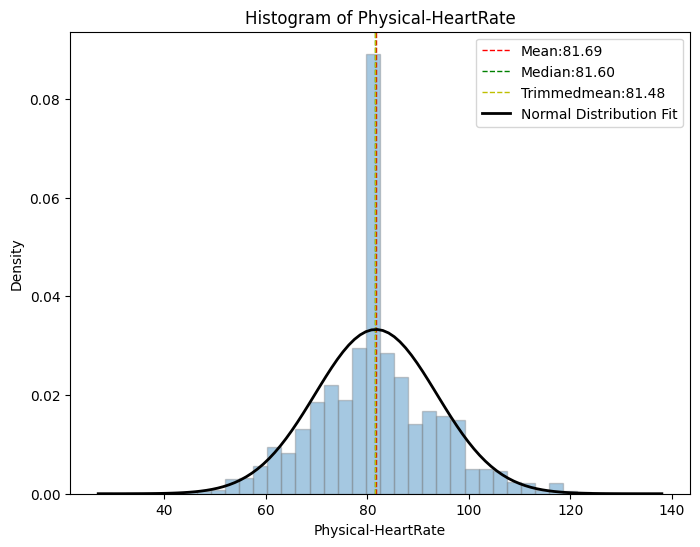

In [29]:
#figure size
plt.rcParams['figure.figsize'] = (8, 6)

#specifying histogram and bins
hist,bin_edges = np.histogram(df_copy['Physical-HeartRate'],bins=40,density=True)
plt.hist(df_copy['Physical-HeartRate'], bins=40, density=True, edgecolor='grey', alpha=0.4)

plt.axvline(mean_value, color='r', linestyle='dashed',linewidth=1, label= f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label= f'Median:{ median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=1,label= f'Trimmedmean:{trimmed_mean:.2f}')

mn,std = sts.norm.fit(df_copy['Physical-HeartRate'])

# Generate x values for the normal distribution curve
x_bin = np.linspace(bin_edges[0], bin_edges[-1], 100)

# Calculate normal distribution curve
y_curve = sts.norm.pdf(x_bin, mn, std)

# Plot normal distribution curve
plt.plot(x_bin, y_curve, 'k', linewidth=2, label='Normal Distribution Fit')

# Add labels, title, and legend
plt.xlabel('Physical-HeartRate')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of Physical-HeartRate')

# Show plot
plt.show()

In [30]:
from scipy.stats import skew, kurtosis  # Ensure you import the functions
from scipy.stats import trim_mean
trim_propotion= 0.1
mean_value = df_copy['Physical-Systolic_BP'].mean()
median_value =df_copy['Physical-Systolic_BP'].median()
mode_value = df_copy['Physical-Systolic_BP'].mode()

# Calculate skewness and kurtosis for 'Physical-Systolic_BP' column
skewness_value = skew(df_copy['Physical-Systolic_BP'], nan_policy='omit')  # Ignore NaNs if any
kurtosis_value = kurtosis(df_copy['Physical-Systolic_BP'], nan_policy='omit')  # Ignore NaNs if any

skewness_value= round(sts.skew(df_copy['Physical-Systolic_BP'],axis=0, bias=True),1)
IQR = round(sts.iqr(df_copy['Physical-Systolic_BP'],axis=0,rng=(25,75)),2)
kurtosis = round(sts.kurtosis(df_copy['Physical-Systolic_BP'],axis=0, bias=True, fisher=0),1)
lower_bound = df_copy['Physical-Systolic_BP'].quantile(0.25) - 1.5 * IQR
upper_bound = df_copy['Physical-Systolic_BP'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df_copy[(df_copy['Physical-Systolic_BP'] < lower_bound) | (df_copy['Physical-Systolic_BP'] > upper_bound)].shape[0]

trimmed_mean= trim_mean(df_copy['Physical-Systolic_BP'],trim_propotion)
print("Mean:",mean_value)
print("Median:",median_value)
print("Mode:",mode_value)
print("Skewness:",skewness_value)
print("IQR:",IQR)
print("kurtosis:",kurtosis)
print("outlier:", outliers_count)
print("trimmed_mean:",trimmed_mean)


Mean: 117.02297152294783
Median: 116.98307379823967
Mode: 0    116.983074
Name: Physical-Systolic_BP, dtype: float64
Skewness: 0.9
IQR: 13.0
kurtosis: 7.8
outlier: 307
trimmed_mean: 115.94676995924033


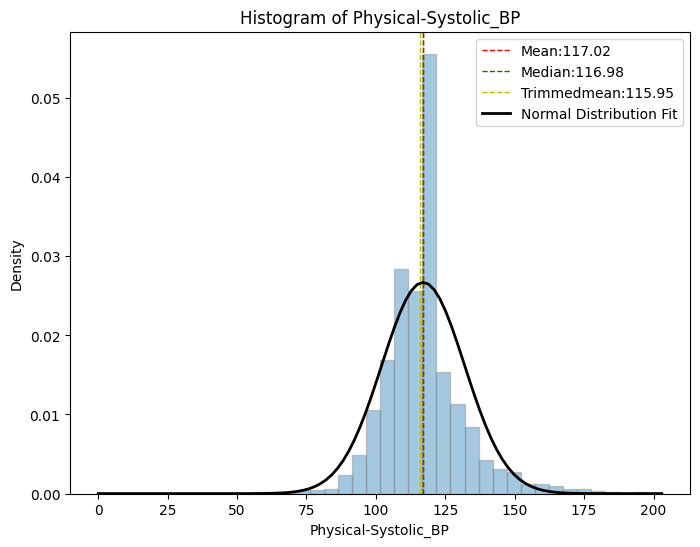

In [31]:
#figure size
plt.rcParams['figure.figsize'] = (8, 6)

#specifying histogram and bins
hist,bin_edges = np.histogram(df_copy['Physical-Systolic_BP'],bins=40,density=True)
plt.hist(df_copy['Physical-Systolic_BP'], bins=40, density=True, edgecolor='grey', alpha=0.4)

plt.axvline(mean_value, color='r', linestyle='dashed',linewidth=1, label= f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label= f'Median:{ median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=1,label= f'Trimmedmean:{trimmed_mean:.2f}')

mn,std = sts.norm.fit(df_copy['Physical-Systolic_BP'])

# Generate x values for the normal distribution curve
x_bin = np.linspace(bin_edges[0], bin_edges[-1], 100)

# Calculate normal distribution curve
y_curve = sts.norm.pdf(x_bin, mn, std)

# Plot normal distribution curve
plt.plot(x_bin, y_curve, 'k', linewidth=2, label='Normal Distribution Fit')

# Add labels, title, and legend
plt.xlabel('Physical-Systolic_BP')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of Physical-Systolic_BP')

# Show plot
plt.show()

In [32]:
from scipy.stats import skew, kurtosis  # Ensure you import the functions
from scipy.stats import trim_mean
trim_propotion= 0.1
mean_value = df_copy['BIA-BIA_BMR'].mean()
median_value =df_copy['BIA-BIA_BMR'].median()
mode_value = df_copy['BIA-BIA_BMR'].mode()

# Calculated skewness and kurtosis for 'BIA-BIA_BMR' column
skewness_value = skew(df_copy['BIA-BIA_BMR'], nan_policy='omit')  # Ignore NaNs if any
kurtosis_value = kurtosis(df_copy['BIA-BIA_BMR'], nan_policy='omit')  # Ignore NaNs if any

skewness_value= round(sts.skew(df_copy['BIA-BIA_BMR'],axis=0, bias=True),1)
IQR = round(sts.iqr(df_copy['BIA-BIA_BMR'],axis=0,rng=(25,75)),2)
kurtosis = round(sts.kurtosis(df_copy['BIA-BIA_BMR'],axis=0, bias=True, fisher=0),1)
lower_bound = df_copy['BIA-BIA_BMR'].quantile(0.25) - 1.5 * IQR
upper_bound = df_copy['BIA-BIA_BMR'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df_copy[(df_copy['BIA-BIA_BMR'] < lower_bound) | (df_copy['BIA-BIA_BMR'] > upper_bound)].shape[0]

trimmed_mean= trim_mean(df_copy['BIA-BIA_BMR'],trim_propotion)
print("Mean:",mean_value)
print("Median:",median_value)
print("Mode:",mode_value)
print("Skewness:",skewness_value)
print("IQR:",IQR)
print("kurtosis:",kurtosis)
print("outlier:", outliers_count)
print("trimmed_mean:",trimmed_mean)

Mean: 1237.8323402776637
Median: 1204.6659
Mode: 0    1237.018187
Name: BIA-BIA_BMR, dtype: float64
Skewness: 55.7
IQR: 250.92
kurtosis: 3325.7
outlier: 186
trimmed_mean: 1180.8641892990995


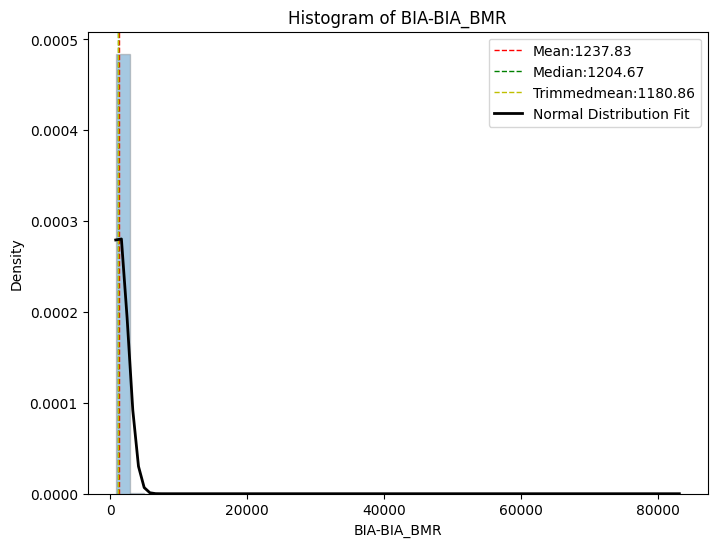

In [33]:
#figure size
plt.rcParams['figure.figsize'] = (8, 6)

#specifying histogram and bins
hist,bin_edges = np.histogram(df_copy['BIA-BIA_BMR'],bins=40,density=True)
plt.hist(df_copy['BIA-BIA_BMR'], bins=40, density=True, edgecolor='grey', alpha=0.4)

plt.axvline(mean_value, color='r', linestyle='dashed',linewidth=1, label= f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label= f'Median:{ median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=1,label= f'Trimmedmean:{trimmed_mean:.2f}')

mn,std = sts.norm.fit(df_copy['BIA-BIA_BMR'])

# Generate x values for the normal distribution curve
x_bin = np.linspace(bin_edges[0], bin_edges[-1], 100)

# Calculate normal distribution curve
y_curve = sts.norm.pdf(x_bin, mn, std)

# Plot normal distribution curve
plt.plot(x_bin, y_curve, 'k', linewidth=2, label='Normal Distribution Fit')

# Add labels, title, and legend
plt.xlabel('BIA-BIA_BMR')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of BIA-BIA_BMR')

# Show plot
plt.show()

In [34]:
from scipy.stats import skew, kurtosis  # Ensure you import the functions
from scipy.stats import trim_mean
trim_propotion= 0.1
mean_value = df_copy['BIA-BIA_DEE'].mean()
median_value =df_copy['BIA-BIA_DEE'].median()
mode_value = df_copy['BIA-BIA_DEE'].mode()

# Calculate skewness and kurtosis for 'BIA-BIA_DEE' column
skewness_value = skew(df_copy['BIA-BIA_DEE'], nan_policy='omit')  # Ignore NaNs if any
kurtosis_value = kurtosis(df_copy['BIA-BIA_DEE'], nan_policy='omit')  # Ignore NaNs if any

skewness_value= round(sts.skew(df_copy['BIA-BIA_DEE'],axis=0, bias=True),1)
IQR = round(sts.iqr(df_copy['BIA-BIA_DEE'],axis=0,rng=(25,75)),2)
kurtosis = round(sts.kurtosis(df_copy['BIA-BIA_DEE'],axis=0, bias=True, fisher=0),1)
lower_bound = df_copy['BIA-BIA_DEE'].quantile(0.25) - 1.5 * IQR
upper_bound = df_copy['BIA-BIA_DEE'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df_copy[(df_copy['BIA-BIA_DEE'] < lower_bound) | (df_copy['BIA-BIA_DEE'] > upper_bound)].shape[0]

trimmed_mean= trim_mean(df_copy['BIA-BIA_DEE'],trim_propotion)
print("Mean:",mean_value)
print("Median:",median_value)
print("Mode:",mode_value)
print("Skewness:",skewness_value)
print("IQR:",IQR)
print("kurtosis:",kurtosis)
print("outlier:", outliers_count)
print("trimmed_mean:",trimmed_mean)

Mean: 2066.7903823209494
Median: 2025.717
Mode: 0    2064.693747
Name: BIA-BIA_DEE, dtype: float64
Skewness: 53.4
IQR: 484.64
kurtosis: 3143.3
outlier: 220
trimmed_mean: 1972.0098491133078


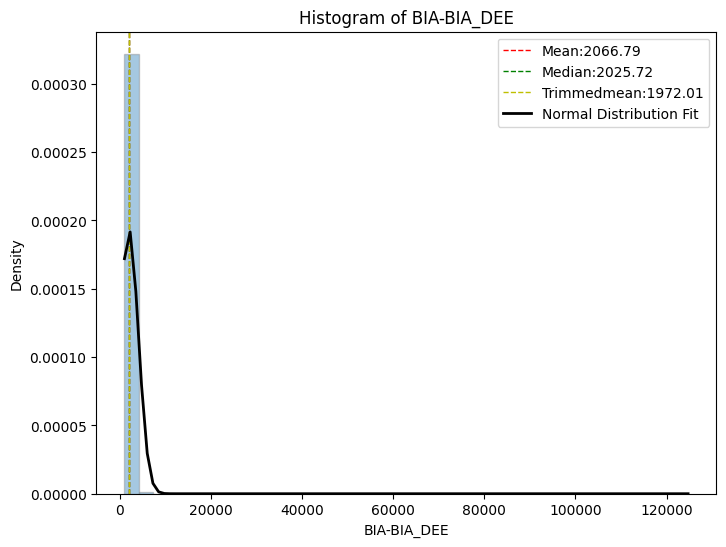

In [35]:
#figure size
plt.rcParams['figure.figsize'] = (8, 6)

#specifying histogram and bins
hist,bin_edges = np.histogram(df_copy['BIA-BIA_DEE'],bins=40,density=True)
plt.hist(df_copy['BIA-BIA_DEE'], bins=40, density=True, edgecolor='grey', alpha=0.4)

plt.axvline(mean_value, color='r', linestyle='dashed',linewidth=1, label= f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label= f'Median:{ median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=1,label= f'Trimmedmean:{trimmed_mean:.2f}')

mn,std = sts.norm.fit(df_copy['BIA-BIA_DEE'])

# Generate x values for the normal distribution curve
x_bin = np.linspace(bin_edges[0], bin_edges[-1], 100)

# Calculate normal distribution curve
y_curve = sts.norm.pdf(x_bin, mn, std)

# Plot normal distribution curve
plt.plot(x_bin, y_curve, 'k', linewidth=2, label='Normal Distribution Fit')

# Add labels, title, and legend
plt.xlabel('BIA-BIA_DEE')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of BIA-BIA_DEE')

# Show plot
plt.show()

In [36]:
from scipy.stats import skew, kurtosis  # Ensure you import the functions
from scipy.stats import trim_mean
trim_propotion= 0.1
mean_value = df_copy['BIA-BIA_FFM'].mean()
median_value =df_copy['BIA-BIA_FFM'].median()
mode_value = df_copy['BIA-BIA_FFM'].mode()

# Calculate skewness and kurtosis for 'BIA-BIA_FFM' column
skewness_value = skew(df_copy['BIA-BIA_FFM'], nan_policy='omit')  # Ignore NaNs if any
kurtosis_value = kurtosis(df_copy['BIA-BIA_FFM'], nan_policy='omit')  # Ignore NaNs if any

skewness_value= round(sts.skew(df_copy['BIA-BIA_FFM'],axis=0, bias=True),1)
IQR = round(sts.iqr(df_copy['BIA-BIA_FFM'],axis=0,rng=(25,75)),2)
kurtosis = round(sts.kurtosis(df_copy['BIA-BIA_FFM'],axis=0, bias=True, fisher=0),1)
lower_bound = df_copy['BIA-BIA_FFM'].quantile(0.25) - 1.5 * IQR
upper_bound = df_copy['BIA-BIA_FFM'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df_copy[(df_copy['BIA-BIA_FFM'] < lower_bound) | (df_copy['BIA-BIA_FFM'] > upper_bound)].shape[0]

trimmed_mean= trim_mean(df_copy['BIA-BIA_FFM'],trim_propotion)
print("Mean:",mean_value)
print("Median:",median_value)
print("Mode:",mode_value)
print("Skewness:",skewness_value)
print("IQR:",IQR)
print("kurtosis:",kurtosis)
print("outlier:", outliers_count)
print("trimmed_mean:",trimmed_mean)

Mean: 74.10842402983123
Median: 70.57568
Mode: 0    74.021708
Name: BIA-BIA_FFM, dtype: float64
Skewness: 55.7
IQR: 26.73
kurtosis: 3325.7
outlier: 186
trimmed_mean: 68.04056337693548


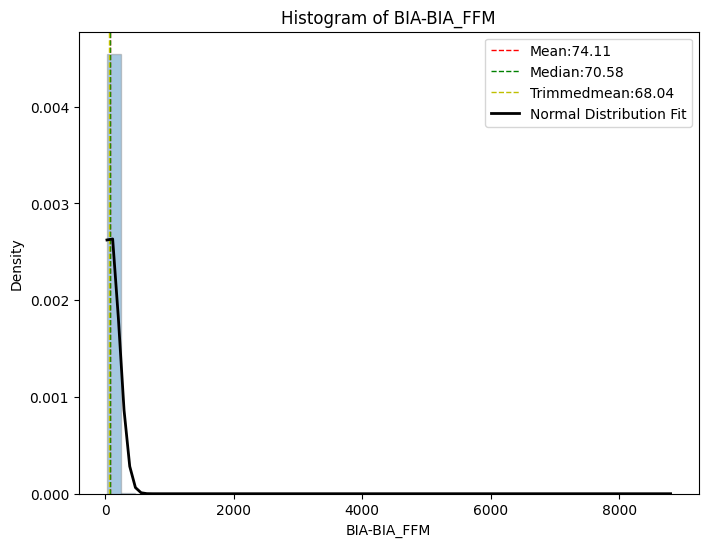

In [37]:
#figure size
plt.rcParams['figure.figsize'] = (8, 6)

#specifying histogram and bins
hist,bin_edges = np.histogram(df_copy['BIA-BIA_FFM'],bins=40,density=True)
plt.hist(df_copy['BIA-BIA_FFM'], bins=40, density=True, edgecolor='grey', alpha=0.4)

plt.axvline(mean_value, color='r', linestyle='dashed',linewidth=1, label= f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label= f'Median:{ median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=1,label= f'Trimmedmean:{trimmed_mean:.2f}')

mn,std = sts.norm.fit(df_copy['BIA-BIA_FFM'])

# Generate x values for the normal distribution curve
x_bin = np.linspace(bin_edges[0], bin_edges[-1], 100)

# Calculate normal distribution curve
y_curve = sts.norm.pdf(x_bin, mn, std)

# Plot normal distribution curve
plt.plot(x_bin, y_curve, 'k', linewidth=2, label='Normal Distribution Fit')

# Add labels, title, and legend
plt.xlabel('BIA-BIA_FFM')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of BIA-BIA_FFM')

# Show plot
plt.show()

In [38]:
from scipy.stats import skew, kurtosis  # Ensure you import the functions
from scipy.stats import trim_mean
trim_propotion= 0.1
mean_value = df_copy['PCIAT-PCIAT_Total'].mean()
median_value =df_copy['PCIAT-PCIAT_Total'].median()
mode_value = df_copy['PCIAT-PCIAT_Total'].mode()

# Calculate skewness and kurtosis for 'PCIAT-PCIAT_Total' column
skewness_value = skew(df_copy['PCIAT-PCIAT_Total'], nan_policy='omit')  # Ignore NaNs if any
kurtosis_value = kurtosis(df_copy['PCIAT-PCIAT_Total'], nan_policy='omit')  # Ignore NaNs if any

skewness_value= round(sts.skew(df_copy['PCIAT-PCIAT_Total'],axis=0, bias=True),1)
IQR = round(sts.iqr(df_copy['PCIAT-PCIAT_Total'],axis=0,rng=(25,75)),2)
kurtosis = round(sts.kurtosis(df_copy['PCIAT-PCIAT_Total'],axis=0, bias=True, fisher=0),1)
lower_bound = df_copy['PCIAT-PCIAT_Total'].quantile(0.25) - 1.5 * IQR
upper_bound = df_copy['PCIAT-PCIAT_Total'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df_copy[(df_copy['PCIAT-PCIAT_Total'] < lower_bound) | (df_copy['PCIAT-PCIAT_Total'] > upper_bound)].shape[0]

trimmed_mean= trim_mean(df_copy['PCIAT-PCIAT_Total'],trim_propotion)
print("Mean:",mean_value)
print("Median:",median_value)
print("Mode:",mode_value)
print("Skewness:",skewness_value)
print("IQR:",IQR)
print("kurtosis:",kurtosis)
print("outlier:", outliers_count)
print("trimmed_mean:",trimmed_mean)

Mean: 27.676355366530803
Median: 27.896198830409357
Mode: 0    27.896199
Name: PCIAT-PCIAT_Total, dtype: float64
Skewness: 0.6
IQR: 19.0
kurtosis: 3.7
outlier: 148
trimmed_mean: 26.63067148089078


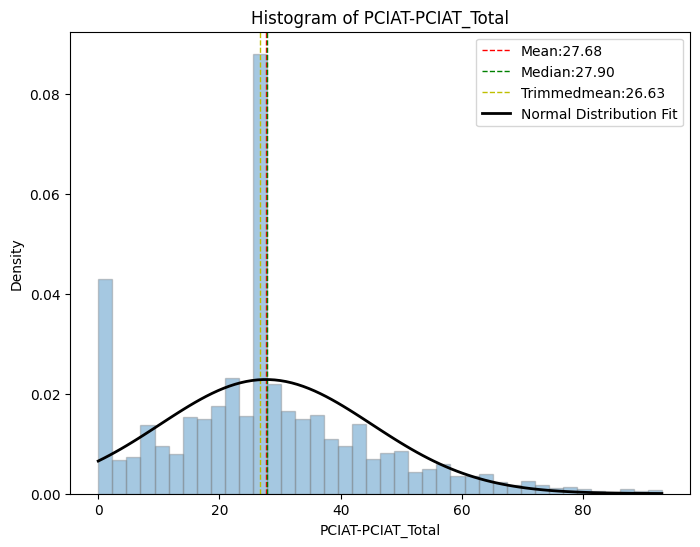

In [39]:
#figure size
plt.rcParams['figure.figsize'] = (8, 6)

#specifying histogram and bins
hist,bin_edges = np.histogram(df_copy['PCIAT-PCIAT_Total'],bins=40,density=True)
plt.hist(df_copy['PCIAT-PCIAT_Total'], bins=40, density=True, edgecolor='grey', alpha=0.4)

plt.axvline(mean_value, color='r', linestyle='dashed',linewidth=1, label= f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label= f'Median:{ median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=1,label= f'Trimmedmean:{trimmed_mean:.2f}')

mn,std = sts.norm.fit(df_copy['PCIAT-PCIAT_Total'])

# Generate x values for the normal distribution curve
x_bin = np.linspace(bin_edges[0], bin_edges[-1], 100)

# Calculate normal distribution curve
y_curve = sts.norm.pdf(x_bin, mn, std)

# Plot normal distribution curve
plt.plot(x_bin, y_curve, 'k', linewidth=2, label='Normal Distribution Fit')

# Add labels, title, and legend
plt.xlabel('PCIAT-PCIAT_Total')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of PCIAT-PCIAT_Total')

# Show plot
plt.show()

In [40]:
from scipy.stats import skew, kurtosis  # Ensure you import the functions
from scipy.stats import trim_mean
trim_propotion= 0.1
mean_value = df_copy['SDS-SDS_Total_Raw'].mean()
median_value =df_copy['SDS-SDS_Total_Raw'].median()
mode_value = df_copy['SDS-SDS_Total_Raw'].mode()

# Calculate skewness and kurtosis for 'SDS-SDS_Total_Raw' column
skewness_value = skew(df_copy['SDS-SDS_Total_Raw'], nan_policy='omit')  # Ignore NaNs if any
kurtosis_value = kurtosis(df_copy['SDS-SDS_Total_Raw'], nan_policy='omit')  # Ignore NaNs if any

skewness_value= round(sts.skew(df_copy['SDS-SDS_Total_Raw'],axis=0, bias=True),1)
IQR = round(sts.iqr(df_copy['SDS-SDS_Total_Raw'],axis=0,rng=(25,75)),2)
kurtosis = round(sts.kurtosis(df_copy['SDS-SDS_Total_Raw'],axis=0, bias=True, fisher=0),1)
lower_bound = df_copy['SDS-SDS_Total_Raw'].quantile(0.25) - 1.5 * IQR
upper_bound = df_copy['SDS-SDS_Total_Raw'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df_copy[(df_copy['SDS-SDS_Total_Raw'] < lower_bound) | (df_copy['SDS-SDS_Total_Raw'] > upper_bound)].shape[0]

trimmed_mean= trim_mean(df_copy['SDS-SDS_Total_Raw'],trim_propotion)
print("Mean:",mean_value)
print("Median:",median_value)
print("Mode:",mode_value)
print("Skewness:",skewness_value)
print("IQR:",IQR)
print("kurtosis:",kurtosis)
print("outlier:", outliers_count)
print("trimmed_mean:",trimmed_mean)

Mean: 40.96992694286677
Median: 41.0
Mode: 0    41.088923
Name: SDS-SDS_Total_Raw, dtype: float64
Skewness: 1.4
IQR: 8.2
kurtosis: 6.7
outlier: 236
trimmed_mean: 40.084757163431945


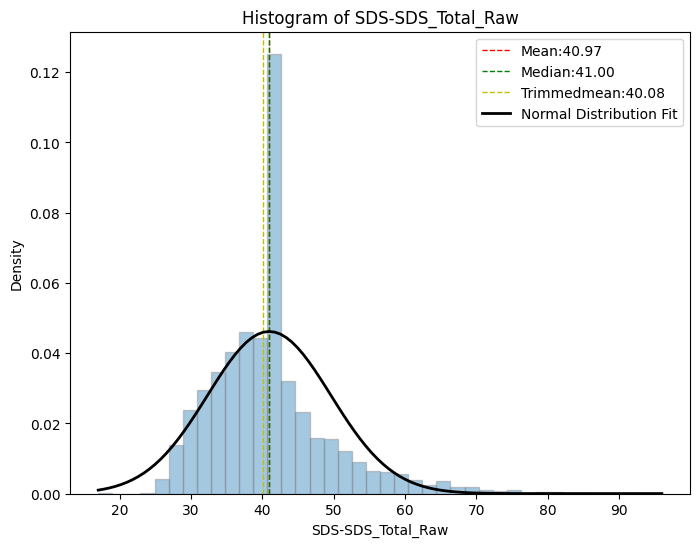

In [41]:
#figure size
plt.rcParams['figure.figsize'] = (8, 6)

#specifying histogram and bins
hist,bin_edges = np.histogram(df_copy['SDS-SDS_Total_Raw'],bins=40,density=True)
plt.hist(df_copy['SDS-SDS_Total_Raw'], bins=40, density=True, edgecolor='grey', alpha=0.4)

plt.axvline(mean_value, color='r', linestyle='dashed',linewidth=1, label= f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label= f'Median:{ median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=1,label= f'Trimmedmean:{trimmed_mean:.2f}')

mn,std = sts.norm.fit(df_copy['SDS-SDS_Total_Raw'])

# Generate x values for the normal distribution curve
x_bin = np.linspace(bin_edges[0], bin_edges[-1], 100)

# Calculate normal distribution curve
y_curve = sts.norm.pdf(x_bin, mn, std)

# Plot normal distribution curve
plt.plot(x_bin, y_curve, 'k', linewidth=2, label='Normal Distribution Fit')

# Add labels, title, and legend
plt.xlabel('SDS-SDS_Total_Raw')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of SDS-SDS_Total_Raw')

# Show plot
plt.show()

In [42]:
from scipy.stats import skew, kurtosis  # Ensure you import the functions
from scipy.stats import trim_mean
trim_propotion= 0.1
mean_value = df_copy['SDS-SDS_Total_T'].mean()
median_value =df_copy['SDS-SDS_Total_T'].median()
mode_value = df_copy['SDS-SDS_Total_T'].mode()

# Calculated skewness and kurtosis for 'SDS-SDS_Total_T' column
skewness_value = skew(df_copy['SDS-SDS_Total_T'], nan_policy='omit')  # Ignore NaNs if any
kurtosis_value = kurtosis(df_copy['SDS-SDS_Total_T'], nan_policy='omit')  # Ignore NaNs if any

skewness_value= round(sts.skew(df_copy['SDS-SDS_Total_T'],axis=0, bias=True),1)
IQR = round(sts.iqr(df_copy['SDS-SDS_Total_T'],axis=0,rng=(25,75)),2)
kurtosis = round(sts.kurtosis(df_copy['SDS-SDS_Total_T'],axis=0, bias=True, fisher=0),1)
lower_bound = df_copy['SDS-SDS_Total_T'].quantile(0.25) - 1.5 * IQR
upper_bound = df_copy['SDS-SDS_Total_T'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df_copy[(df_copy['SDS-SDS_Total_T'] < lower_bound) | (df_copy['SDS-SDS_Total_T'] > upper_bound)].shape[0]

trimmed_mean= trim_mean(df_copy['SDS-SDS_Total_T'],trim_propotion)
print("Mean:",mean_value)
print("Median:",median_value)
print("Mode:",mode_value)
print("Skewness:",skewness_value)
print("IQR:",IQR)
print("kurtosis:",kurtosis)
print("outlier:", outliers_count)
print("trimmed_mean:",trimmed_mean)

Mean: 57.66826220764824
Median: 57.76362240982348
Mode: 0    57.763622
Name: SDS-SDS_Total_T, dtype: float64
Skewness: 1.2
IQR: 11.05
kurtosis: 5.2
outlier: 234
trimmed_mean: 56.588294931277474


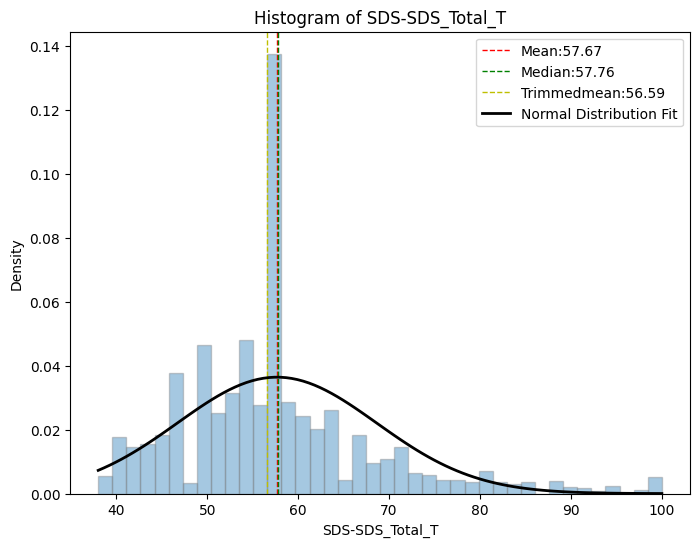

In [43]:
#figure size
plt.rcParams['figure.figsize'] = (8, 6)

#specifying histogram and bins
hist,bin_edges = np.histogram(df_copy['SDS-SDS_Total_T'],bins=40,density=True)
plt.hist(df_copy['SDS-SDS_Total_T'], bins=40, density=True, edgecolor='grey', alpha=0.4)

plt.axvline(mean_value, color='r', linestyle='dashed',linewidth=1, label= f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label= f'Median:{ median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=1,label= f'Trimmedmean:{trimmed_mean:.2f}')

mn,std = sts.norm.fit(df_copy['SDS-SDS_Total_T'])

# Generated x values for the normal distribution curve
x_bin = np.linspace(bin_edges[0], bin_edges[-1], 100)

# Calculated normal distribution curve
y_curve = sts.norm.pdf(x_bin, mn, std)

# Ploted normal distribution curve
plt.plot(x_bin, y_curve, 'k', linewidth=2, label='Normal Distribution Fit')

# Added labels, title, and legend
plt.xlabel('SDS-SDS_Total_T')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of SDS-SDS_Total_T')

# Show plot
plt.show()

mode < median < mean from the above visualization, it is confirmed that the distribution is non-normal in nature. 

# 

In [44]:
print(df_combined['sii'].value_counts(normalize=True))

sii
0.0    0.582602
1.0    0.266813
2.0    0.138158
3.0    0.012427
Name: proportion, dtype: float64


The dataset is highly imbalanced due to the social interaction scale in this study is higher compare to the non-social interaction with humans.